# Figures 1


## Setup

In [7]:
from __future__ import print_function
import os, sys
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper")
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True
plt.rcParams['image.cmap'] = 'viridis'

# Add cornet and Theano to path
sys.path.insert(0, '../')


## Load data

In [8]:
from cornet_exp.util import load_data
from cornet_exp.gntk_res import GNTK
import scipy
from multiprocessing import Pool

graphs, _  = load_data('MUTAG', False)
labels = np.array([g.label for g in graphs]).astype(int)

layers= 300

gntk = GNTK(num_layers=layers,  num_mlp_layers=3, jk=0, scale='degree')
A_list = []
diag_list = []

# procesing the data
for i in range(len(graphs)):
   
    n = len(graphs[i].neighbors)
    for j in range(n):
        graphs[i].neighbors[j].append(j)

        
    edges = graphs[i].g.edges
    m = len(edges)

    row = [e[0] for e in edges]
    col = [e[1] for e in edges]

    A_list.append(scipy.sparse.coo_matrix(([1] * len(edges), (row, col)), shape = (n, n), dtype = np.float32))    
    A_list[-1] = A_list[-1] + A_list[-1].T + scipy.sparse.identity(n)
    
    diag = gntk.diag(graphs[i], A_list[i])
    diag_list.append(diag)  
        
def calc(T):
    return gntk.gntk(graphs[T[0]], graphs[T[1]], diag_list[T[0]], diag_list[T[1]], A_list[T[0]], A_list[T[1]])


#print (graphs[graph1].label)

length = 3
g1 = 3; g2 = 7
#calc_list = [(i, j) for i in range(length) for j in range(i, length)]
calc_list = [(g1,g2)]


#pool = Pool(80)
results_list = []
sigma_list = []
dotsigma_list = []
ntk_list = []

for liste in calc_list:
    #print (liste)
    results, sigma_ab, ntk_ab,dotsigma_ab = calc(liste)
    sigma_list.append(sigma_ab)
    dotsigma_list.append(dotsigma_ab)
    ntk_list.append(ntk_ab)
   

node_number1 = len(graphs[g1].g.node)
node_number2 = len(graphs[g2].g.node)    
  
#results, sigma_list = pool.map(calc, calc_list)

loading data
# classes: 2
# maximum node tag: 7
# data: 188


In [9]:
print (len(ntk_list[0]))
print (len(sigma_list[0]))
print (len(dotsigma_list[0]))
length = len(ntk_list[0])

print (length)

898
898
897
898


In [10]:
element_sigma = np.zeros((1,node_number1*node_number2,length ))
element_ntk = np.zeros((1,node_number1*node_number2,length ))
element_dot = np.zeros((1,node_number1*node_number2,length ))

for i in range(length):
    for n1 in range(node_number1):
        for n2 in range(node_number2):
            index = n1+n2*node_number1
            for j in range(1):
                element_sigma[j,index,i] = sigma_list[j][i][n1][n2]
                element_ntk[j,index,i] = ntk_list[j][i][n1][n2]
                #element_dot[j,index,i] = dotsigma_list[j][i][n1][n2]

0.8134278843370273


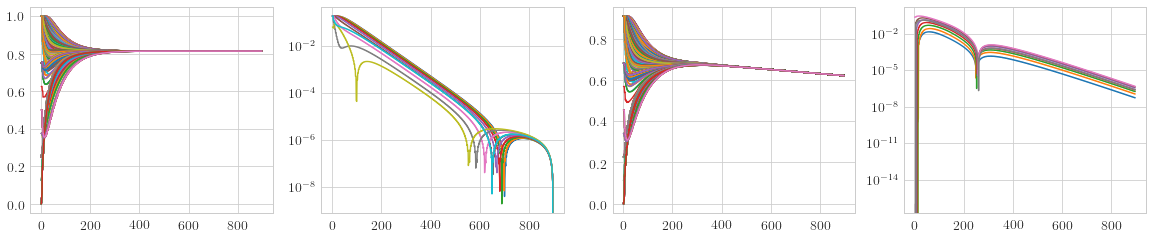

In [11]:
plt.figure(figsize=(20, 3.8))
gs = plt.GridSpec(1, 4)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

t = np.arange(0,length)+1
yt = np.exp(-0.015*t)
print(element_sigma[0][0][-1]/1.1**(t[-1]-1))

plt.subplot(gs[0, 0])
for i in range(node_number1*node_number2):
    plt.plot(t,element_sigma[0][i]/(1.1**(t-1)))
    
plt.subplot(gs[0, 1])
#plt.ylim(10e-16,1)
#plt.semilogy(t,yt,'black')
for i in range(10):
    plt.semilogy(t,np.abs(element_sigma[0][i]/(1.1**(t-1))-element_sigma[0][i][-1]/(1.1**(t[-1]-1)))) 
   
    
plt.subplot(gs[0, 2])
for i in range(node_number1*node_number2):
    plt.plot(t,element_ntk[0][i]/(t*1.1**(t)))
    
plt.subplot(gs[0, 3])
#plt.semilogy(t,yt,'black')
#plt.ylim(10e-16,1)
for i in range(2,10):
    plt.semilogy(t,np.abs(element_ntk[0][i]/(t*1.1**t)-element_ntk[0][1]/(t*1.1**t))) 
    

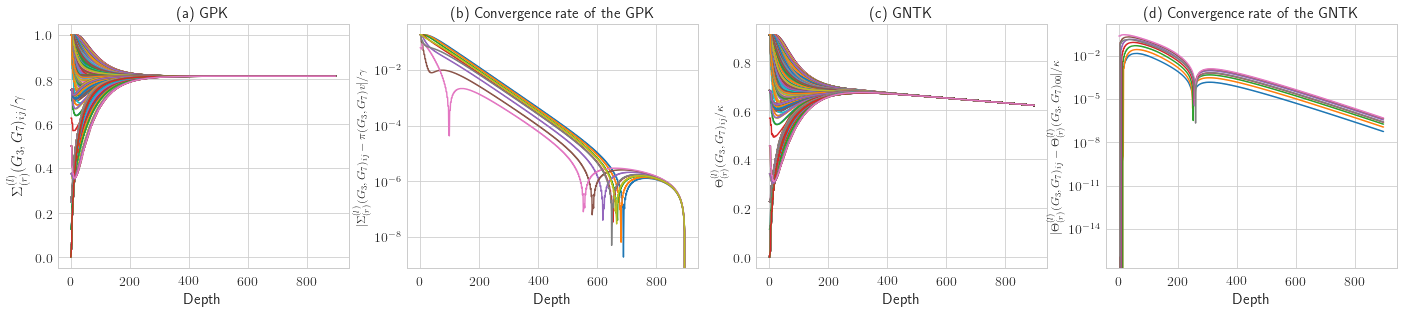

In [12]:
plt.figure(figsize=(24, 4.5))
gs = plt.GridSpec(1, 4)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

plt.subplot(gs[0, 0])

for i in range(node_number1*node_number2):
    plt.plot(t,element_sigma[0][i]/(1.1**(t-1)))

plt.xlabel('Depth', fontsize=15); plt.ylabel('$\Sigma^{(l)}_{(r)}(G_3,G_7)_{ij}/\gamma$', fontsize=15)
plt.title('(a) GPK', fontsize=15)


plt.subplot(gs[0, 1])
#plt.semilogy(t,yt1,'black',label='y=exp(-0.15x)')
for i in range(2,11):
    plt.semilogy(t,np.abs(element_sigma[0][i]/(1.1**(t-1))-element_sigma[0][i][-1]/(1.1**(t[-1]-1)))) 
plt.xlabel('Depth', fontsize=15); plt.ylabel('$|\Sigma^{(l)}_{(r)}(G_3,G_7)_{ij} - \pi(G_3,G_7) v|/\gamma$', fontsize=12)
plt.title('(b)  Convergence rate of the GPK', fontsize=15)


plt.subplot(gs[0, 2])
#plt.xticks([0, 0.5, 1]); plt.yticks([0, 0.5, 1]); plt.xlim(0, 1); plt.ylim(0, 1)
for i in range(node_number1*node_number2):
    plt.plot(t,element_ntk[0][i]/(t*1.1**(t)))
plt.xlabel('Depth', fontsize=15); plt.ylabel('$\Theta^{(l)}_{(r)}(G_3,G_7)_{ij}/\kappa$', fontsize=12)
plt.title('(c) GNTK', fontsize=15)


plt.subplot(gs[0, 3])
#plt.xticks([0, 0.5, 1]); plt.yticks([0, 0.5, 1]); plt.xlim(0, 1); plt.ylim(0, 1)
#plt.semilogy(t,5*yt1,'black',label='y=exp(-0.15x)')
for i in range(2,10):
    plt.semilogy(t,np.abs(element_ntk[0][i]/(t*1.1**t)-element_ntk[0][1]/(t*1.1**t))) 
plt.xlabel('Depth', fontsize=15); plt.ylabel('$|\Theta^{(l)}_{(r)}(G_3,G_7)_{ij} - \Theta^{(l)}_{(r)}(G_3,G_7)_{00}|/\kappa $', fontsize=12)
plt.title('(d) Convergence rate of the GNTK', fontsize=15)


plt.savefig("fig2_res.pdf" ,  bbox_inches='tight')
